In [14]:
# Model and history analysis
import pickle
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [26]:
# Choose experiment and load model and history

!ls

expt = 'D'
model_name = 'model' + expt + '.h5'
history_name = 'history' + expt + '.pkl'

model = load_model(model_name)
history = pickle.load(open(history_name, "rb"))

analysis.ipynb
historyA.pkl
historyB.pkl
historyC.h5
historycnnv1_lr0.001_epochs1000_mbsize1232.pkl
historyD.pkl
historyv1_lr0.001_epochs1000_mbsize32.h5
modelA.h5
modelB.h5
modelC.h5
modelcnnv1_lr0.001_epochs1000_mbsize1232.h5
modelD.h5
modelv1_lr0.001_epochs1000_mbsize32.h5


In [21]:
# Test set accuracy
test_x = np.moveaxis(np.load('/data/loop_detector/test_X.npy'), -1, 0)
test_y = np.moveaxis(np.load('/data/loop_detector/test_Y.npy'), -1, 0)
testx = np.expand_dims(test_x, axis=-1)
testy = np.reshape(test_y, (test_y.shape[0], test_y.shape[1]))

acc = np.sum(np.round(model.predict(testx)) == testy) / (testy.shape[0]*testy.shape[1])
acc

0.8405446029082774

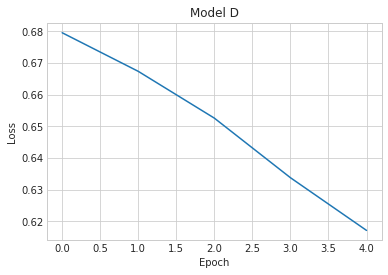

In [27]:
# Plots
plt.plot(history['loss'], label='training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model D')
plt.show()

# plt.plot(history['loss'], label='training loss')
# plt.plot(history['val_loss'], label='validation loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.title('Final CNN Model Loss')
# plt.legend()
# plt.show()

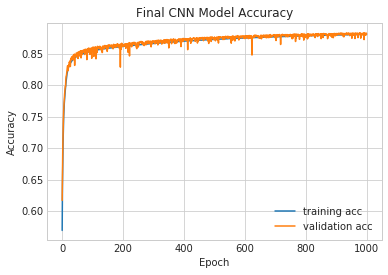

In [25]:
plt.plot(history['acc'], label='training acc')
plt.plot(history['val_acc'], label='validation acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Final CNN Model Accuracy')
plt.legend()
plt.show()

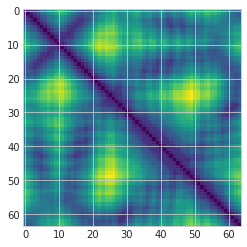

In [30]:
dm = test_x[0]
plt.imshow(dm, cmap='viridis', interpolation='nearest')
plt.show()